# Homework 3

In [ ]:
!pip install llama-index --upgrade
!pip install pypdf
!pip install youtube-search-python
!pip install IPython
!pip install matplotlib
!pip install llama-index-multi-modal-llms-openai
!pip install llama-index-vector-stores-qdrant
!pip install llama-index-embeddings-clip
!pip install git+https://github.com/openai/CLIP.git
!pip install -U qdrant_client

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-15vywkj9
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-15vywkj9
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done


### Prepare Llama Index vector storage, LLM prompts, YT thumbnail downloads, and query engine instantiation.

In [ ]:
import os
import requests;
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from youtubesearchpython import Video, ResultMode
from google.colab import userdata
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, StorageContext
from llama_index.readers.file import ImageReader
import qdrant_client
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index.core import PromptTemplate

# Setup creds.
open_ai_key = userdata.get('open_ai_key')
os.environ["OPENAI_API_KEY"] = open_ai_key

# Setup image storage.
parser = ImageReader()
file_extractor = {
    ".jpg": parser,
    ".jpeg": parser,
}
thumbnail_dir = "./thumbnails"
curr_thumbnail_path = './thumbnails/curr.jpg';
if not os.path.exists(thumbnail_dir):
    os.makedirs(thumbnail_dir)

# Setup LlamaIndex params.
client = qdrant_client.QdrantClient(":memory:")
image_store = QdrantVectorStore(
    client=client, collection_name="images"
)
storage_context = StorageContext.from_defaults(image_store=image_store)
qa_tmpl_str = (
  "Given the images provided, "
  "answer the query.\n"
  "Query: {query_str}\n"
  "Answer: "
)
qa_tmpl = PromptTemplate(qa_tmpl_str)
openai_mm_llm = OpenAIMultiModal(
    model="gpt-4o", api_key=open_ai_key, max_new_tokens=1500
)

def downloadThumbnail(videoId):
  thumbnail_url = f"https://i.ytimg.com/vi/{videoId}/hq720.jpg"
  img_data = requests.get(thumbnail_url).content
  with open(curr_thumbnail_path, 'wb') as handler:
      handler.write(img_data);

  img = mpimg.imread(curr_thumbnail_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

def procureQueryEngine():
  documents = SimpleDirectoryReader(
      thumbnail_dir,
      file_extractor=file_extractor
  ).load_data()
  index = MultiModalVectorStoreIndex.from_documents(
      documents,
      storage_context=storage_context,
  )
  query_engine = index.as_query_engine(
      llm=openai_mm_llm, image_qa_template=qa_tmpl
  )

  return query_engine;

### Provide a video ID and ask questions.

Channel:
**TechLinked** - News about tech & gaming culture, delivered thrice weekly

Video:
*Do we even need ARM?* - https://www.youtube.com/watch?v=-8wDDeCcFhc

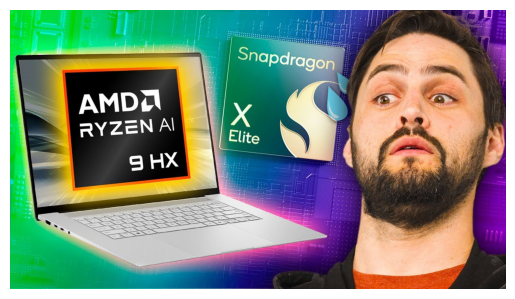

In [ ]:
videoId = "-8wDDeCcFhc"
downloadThumbnail(videoId);

In [ ]:
engine = procureQueryEngine()

response = engine.image_query(
    curr_thumbnail_path,
    "What can you tell me about this image?"
)
print(response)

The image appears to be a promotional or review graphic featuring a laptop with an AMD Ryzen AI 9 HX processor and a Snapdragon X Elite chip. The background is colorful with a tech-themed design. There is also a person in the image who seems to be reacting with surprise or amazement. The overall theme suggests a focus on high-performance computing hardware.


In [ ]:
response = engine.image_query(
    curr_thumbnail_path,
    "What can you tell me about the demographic this image is appealing to?"
)
print(response)

The image appears to be appealing to a tech-savvy demographic, likely those interested in computer hardware and technology. The presence of terms like "AMD Ryzen AI 9 HX" and "Snapdragon X Elite" suggests that the content is focused on high-performance computing components, which would attract enthusiasts, gamers, and professionals who are interested in the latest advancements in processors and AI technology. The visual style, including the use of vibrant colors and a surprised expression, also suggests an attempt to engage a younger audience who are active consumers of tech-related content on platforms like YouTube.


In [ ]:
response = engine.image_query(
    curr_thumbnail_path,
    "This image is a Youtube thumbnail. How would you suggest I change it to improve its click through rate?"
)
print(response)

To improve the click-through rate (CTR) of your YouTube thumbnail, consider the following suggestions:

1. **Enhance Text Readability**: Ensure that any text on the thumbnail is large, bold, and easy to read. Use contrasting colors to make the text stand out against the background.

2. **Add a Catchy Title or Phrase**: Include a short, catchy phrase or title that teases the content of the video. This can create curiosity and encourage viewers to click.

3. **Use Bright and Contrasting Colors**: Bright and contrasting colors can make your thumbnail more eye-catching. Ensure the colors you choose complement each other and draw attention.

4. **Highlight Key Elements**: Make sure the most important elements of the thumbnail (e.g., the laptop, the AMD Ryzen AI 9 HX, and the Snapdragon X Elite) are prominently displayed and not cluttered.

5. **Include a Clear and Expressive Face**: The face in the thumbnail is already expressive, which is good. Ensure the expression matches the content of 